<a href="https://colab.research.google.com/github/AnaisGuillem/historicplacesmerced/blob/master/PanopticSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations

## Installing Dependencies

In [ ]:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
#we also need opencv but is already installed in google colab

## Install Detectron2

In [ ]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

## Import Libraries and utilities

In [112]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog


# Panoptic Segmentation

## Loading Images

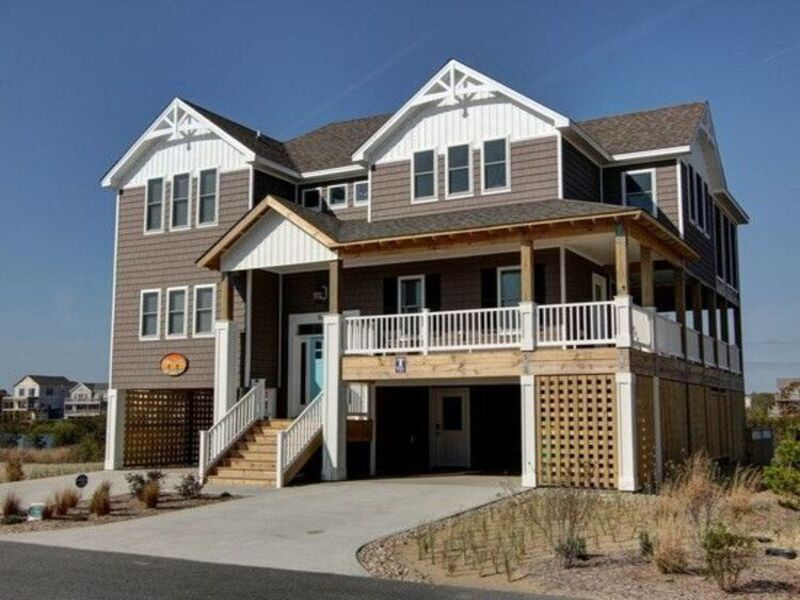

In [113]:
path = '/content/1.jpg'
img = cv2.imread(path) 
cv2_imshow(img)

## Segmentation

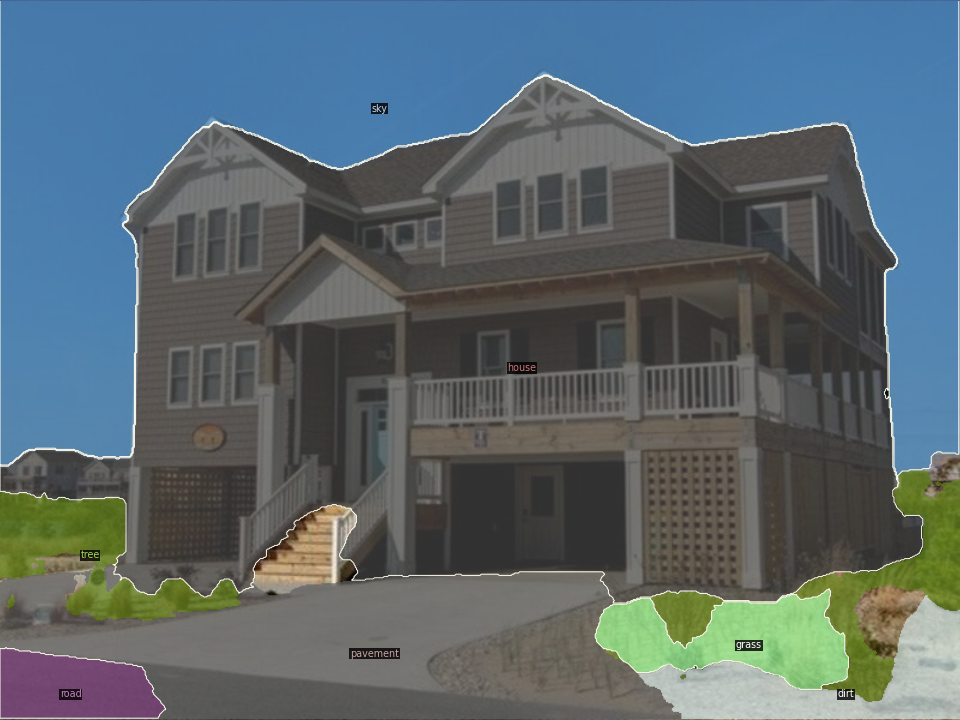

In [118]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(img)["panoptic_seg"]
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])
outputs = predictor(img)

# Metadata analysis 

### Finding the category_id of each mask

In [191]:
print("Segment information: ", segments_info)
print("Categories ids: ")
for data in segments_info:
  print("               ", data.get("category_id"))
  # print(segments_info[i]["category_id"]) is an alternative 


Segment information:  [{'id': 1, 'isthing': False, 'category_id': 12, 'area': 237275.0}, {'id': 2, 'isthing': False, 'category_id': 21, 'area': 6659.0}, {'id': 3, 'isthing': False, 'category_id': 37, 'area': 19158.0}, {'id': 4, 'isthing': False, 'category_id': 40, 'area': 137715.0}, {'id': 5, 'isthing': False, 'category_id': 44, 'area': 50268.0}, {'id': 6, 'isthing': False, 'category_id': 46, 'area': 13547.0}, {'id': 7, 'isthing': False, 'category_id': 47, 'area': 11305.0}]
Categories ids: 
                12
                21
                37
                40
                44
                46
                47


## Finding the "stuff" or "thing" corresponding to the category_id

In [231]:
for data in segments_info:
  print(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).stuff_classes[data.get("category_id")])

house
road
tree
sky
pavement
grass
dirt


## Finding instances and id 

In [ ]:
print(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:

for data in outputs["instances"].pred_classes:
    num = data.item()
    print(num, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[num])
    

58 potted plant
74 clock
